# Hyper-parameter Optimization Algorithm

As introduced previously, nowadays we could use more and more complex machine learning (ML) models every day. This means that we have many more hyper-parameters to tune. A lot of ML model tuning used to be done by hand and accelerated by domain knowledge. This meant that a team of experts was dedicated to a little portfolio of models, with a lot of menial work involved. Automated hyper-parameter tuning brings a solution to these problems.

This notebook would present a brief introduction of hyper-parameter optimization algorithm. Generally speaking, there are three categories of algorithm for hyper-parameter optimization.
* Exhaustive search of space
* Surrogate models
* Algorithms dedicated to hyper-parameter tuning 

## 1 Exhaustive search of space

Exhaustive search of space is an intuitive method to optimize hyper-parameters of machine learning models. Firstly, the range or domin of hyperparameters should be given and then the space of hyper-parameters could be built up. In the spae of hyper-parameters, points could be sampled in a specific way and each point is a combination of hyper-parameters. Machine learning models with these combinations of hyper-parameters will be trained on training set and evaluated on validation set. After evaluating all of these combinations, the one with the highest accuracy or the lowest cost function would be kept as the best choice of hyper-parameters. 

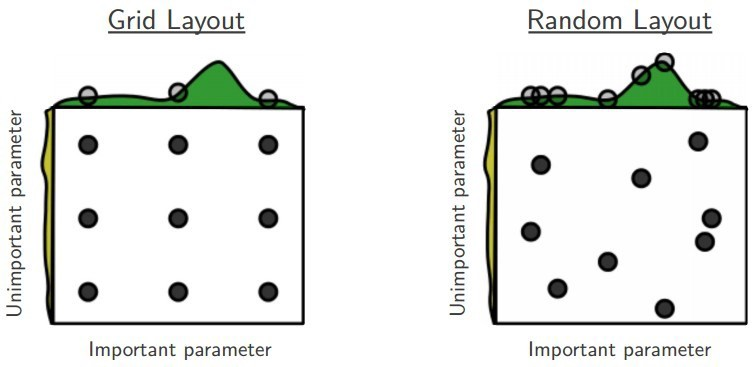

In [1]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/hyperparameter_optimization.jpeg", width=600, height=600 )

### 1.1 Grid search of space
Given the space of hyper-parameters, we would sample points uniformly and then evaluate theses combination of hyper-parameters. Grid search of space is an embarrassingly parallel problem but suffers from curse of dimensionality. 

Emabarrasingly parallel problem is often the case where there is little or no dependency for commnication between thos parallel taskes. In other words, we could evaluate these combination of hyper parameters parallely and every task for evaluating is independent from others.  

Curse of dimensionality here means that when dimension of hyper-parameters increasing, the number of points, combinations of hyper parameters, would increase exponentially. For instace, there are two dimensions and range of the dimension is [0, 10]. If the sampling interval is 0.1, the number of sampling points is $10^4$. If the dimension is increased to 10, with the same range and sampling interval, the number of points would be $10^{20}$.

### 1.2 Random search of space
Unlike grid search, points are sampled randomly. Random search has been proven to be particularly effective of some hyper-parameters which are given a much greater of variation than others. 

### 1.3 Summary
To draw a summary of exhaustive search, the positive includes:
 * (+) easy and intuitive to code.
 * (+) not necessary to do any form of tuning

On the other hand, disadvantages include:
 * (-) no guarantee to find a local optimizing point.
 * (-) if models is complicated, each time evaluation costs a lot of time and these searching algorithms are not efficient.

## 2 Surrogate Model
A surrogate model of the validation loss as a function of hyper-parameters can be fit to the previous tries and thell where the local optimization would be.

### Bayesian Optimization
Bayesian methods is able to find the next set of hyper-parameters to evalute on the actual objective function by selectiong hyper-parameters that perform the best on the surrogate function, which could be described using following steps:
1. Build a surrogate function of objective function.
2. Find hyper-parameters that perform best on the surrogate function.
3. Apply these hyper-parameters to the true objective function.
4. Update surrogate function incorporating the new result.
5. Repeat steps 2-4 until max iteration or time is reached.

Then several terms regarding bayesian optimization would be introduced.

__Domin__: We firstlly need to give the domin or range of hyper-parameters and encode priori knowledge or experience into search process by placing greater probaility in the regions where we thin the best hyperparameters lie.

__Objective Function__: The objective function takes in hyperparameters and outputs a single real-valued score that we want to minimize (or maximize). As an example, let’s consider the case of a regression problem. The hyperparameters we want to optimize are shown in the hyperparameter grid above and the score to minimize is the Root Mean Squared Error.

__Surrogate Function__: The surrogate function, also named as the response surface, is the probability representation of objective function built using previous evaluations. Details woulld be introduced later. 

__Select Function__: The select function is the criteria by which the next set of hyper-parameters are chosen from surrogate function. The most common choice of criteria is Expected Improvement(EI):$$EI_{y^*} = \int_{- \infty}^{y^{*}} (y^{*} - y) p(y|x) dy$$
$y^*$ is a threshold value of objective function, $x$ is the proposed set of hyper-parameters, y is actual value of objective function using hyper-parameter $x$, and $p(y|x)$ is the surrogate probability model expressing the probability of $y$ given $x$.

### Tree-structured Parzen Estimator (TPE)
Tree-structured parzen estimator (TPE) is a probabilty model which could be used as surrogate function in Bayesian optimization. TPE builds up a model by using bayesian rules:$$p(y|x) = \frac{p(x|y) p(y)}{p(x)}$$

$p(y|x)$ is the probability of hyper-paramerters given the score on the objective function and it could be expressed as:
$$p(y|x) = \begin{cases} l(x) \ \ \ \text{if} \ y < y^* \\ g(x) \ \ \ \text{if} \ y > y^* \end{cases}$$
$y$ is the value of obejective function and $y^*$ is the threshold. we define two different distributions for hte hyper-parameters:
* $l(x)$: objective function is less than threshold.
* $g(x)$: objective function is greater than threshold.

from IPython.display import Image
Image(filename="D:/Jupyter_space/hyperparameter_optimization1.png", width=600, height=600 )

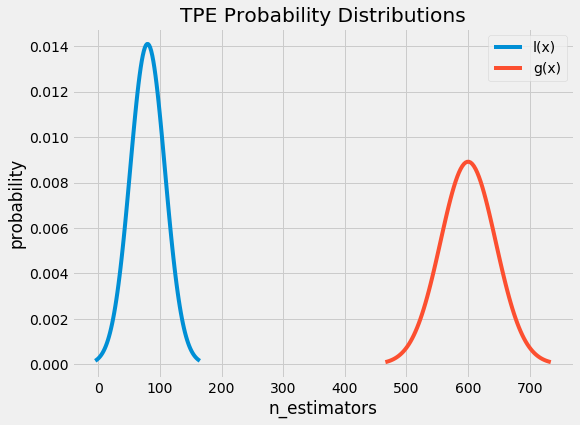

In [7]:
Image(filename="D:/Jupyter_space/hyperparameter_optimization2.png", width=600, height=600 )

The upper image is a example of evaluation of combinations of hyper-parameters and the lower image shows us the two distributions. Then the expected improvment, which we should maximize, could be represented.
$$EI_{y^*}=\frac{\gamma y^*(x) - l(x) \int_{- \infty}^{y^*} p(y) dy}{\gamma l(x) + (1-\gamma)g(x)}$$

## 3 Algorithms dedicated to hyper-parameter tuning

Here are algorithms which were developed specifically for hyper-parameter tuning.

### Hyperband
Hyperband is a variation of random search, but with some explore-exploit theory to find the best time allocation for each of the configurations.A good introduction to this algorithm is the successive halving algorithm:
   * Randomly sample 64 hyper-parameter sets in the search space.
   * Evaluate after 100 iterations the validation loss of all these.
   * Discard the lowest performers of them to keep only a half.
   * Run the good ones for 100 iterations more and evaluate.
   * Discard a half.
   * Run the good ones for 200 iterations more and evaluate.
   * Repeat till you have only one model left.

This algorithm needs a definition of an iteration (can be set so that the first model evaluation is done after a couple of epochs) and a total budget of iterations (which will set the total number of explored configurations).

### PBT (Population-based training)

Population-based training mixes ideas from genetic optimization algorithms during the SGD optimization steps. The learning of the ML model is seen as a dynamical system where hyper-parameters are to be chosen every p time steps.

The idea is the following: take k agents, each of them are given a model to train, randomly sampled from the search space.

After p learning iterations, do the exploit phase of the algorithm:
   * each of the worker compares itself to the other workers (either all of them, a random subset of them, or only one randomly chosen).
   * If the validation performance of the worker is significantly worse (in a statistical meaning) than the best of the others, the worker copies both the hyper-parameters and the weights of the best performing model
   * if the worker has changed its model, do the explore phase of the algorithm, i.e. perturb the hyper-parameters before restarting to learn (several strategies exist: for some randomly chosen hyper-parameters, re-sample them randomly from the search space or perturb them all by a multiplicative coefficient between e.g. 0.8 and 1.2)

Loop the algorithm by relearning for p iterations.

At the end of your training time budget, take the best performing model.